<a href="https://colab.research.google.com/github/dhritisreec/ML/blob/ML-Projects/CustomerSeg_RBMexp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers  import Dense,Activation,Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import BernoulliRBM
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from keras.callbacks import EarlyStopping
import math
import os
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


In [258]:
res = pd.read_csv('swiggy.csv')
hotel = pd.read_csv('HotelData.csv')
hotel_details= pd.read_csv('HotelInfo.csv')

In [259]:
res.head(10)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
5,254,Indiranagar,Bangalore,Treat,800.0,4.5,100,"Mughlai,North Indian",100 Feet Road,56
6,258,Indiranagar,Bangalore,Chinita Real Mexican Food,1000.0,4.5,500,"Mexican,Beverages,Salads",Double Road,53
7,263,Koramangala,Bangalore,Cupcake Noggins - Cakespastries And Desserts,150.0,4.3,100,"Desserts,British,Bakery,Pizzas,Snacks",4Th Block,57
8,267,Domlur,Bangalore,Tea Brew,350.0,4.1,100,"American,Italian,Beverages,Continental,Chinese...",Double Road,57
9,308,Koramangala,Bangalore,Bangaliana,300.0,4.0,500,Bengali,7Th Block,57


In [260]:
res.shape

(8680, 10)

In [261]:
top= res.sort_values(by=['City','Avg ratings','Total ratings'],ascending=False)
top

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
1741,120638,Adajan,Surat,Sobis Diet Farm,400.0,4.8,50,Fast Food,Adajan Gam,52
4592,389388,Adajan,Surat,Kudrati Kahumbo,200.0,4.8,50,Beverages,Adajan,38
7123,66168,Vesu,Surat,The Pancake Story,300.0,4.8,20,"Desserts,Beverages",Prime Shoppers Vesu,58
8002,316581,Nanpura,Surat,Nic Natural Ice Creams,120.0,4.7,500,"Ice Cream,Desserts",Athwa Gate Cirlce,28
4207,374213,Vesu,Surat,The Bungalow Cafe,300.0,4.7,20,"Snacks,Fast Food",Piplod,58
...,...,...,...,...,...,...,...,...,...,...
7585,149204,Naranpura,Ahmedabad,Happy Sugar,350.0,2.8,20,"Desserts,Beverages",Naranpura,46
7601,154603,Ambawadi,Ahmedabad,Mealbox Ambawadi,200.0,2.8,20,"North Indian,Chinese,Punjabi",Navrangpura,39
7177,71274,Ambawadi,Ahmedabad,Foodhut,200.0,2.7,50,Cafe,Vejalpur,44
7769,216229,Ambawadi,Ahmedabad,Urban Foods Ambawadi,250.0,2.6,20,"Chinese,North Indian,Punjabi",Navrangpura,36


In [262]:
res.dtypes

ID                 int64
Area              object
City              object
Restaurant        object
Price            float64
Avg ratings      float64
Total ratings      int64
Food type         object
Address           object
Delivery time      int64
dtype: object

In [263]:
def citybased(city):
    res['City']=res['City'].str.lower()
    citybase=res[res['City']==city.lower()]
    citybase=citybase.sort_values(by='Avg ratings',ascending=False)
    if(citybase.empty==0):
        rname=citybase[['Restaurant','Avg ratings','Address','Price']]
        return rname.head()
    else:
        print('No restuarants Available')

In [264]:
print("Top 5 restuarants")
citybased('Bangalore')

Top 5 restuarants


,Restaurant,Avg ratings,Address,Price
5936,Tricky Shakes,5.0,Koramangala,250.0
8011,Creams & Bites,5.0,Basavanagudi,200.0
8301,Hokart - Soori Chaats,4.9,Koramangala,150.0
1048,Royce' Chocolate,4.9,Foodhall,750.0
1764,Frosty Crumble,4.9,Residency Road,450.0


In [265]:
hotel.head()

,Unnamed: 0,_id,Unnamed: 2,Name,URL,Total Rating,Review_Score,New Total,Code,Rating,City_y,Amenities,Latitude,Longitude,Price,Address,City,CityLabel,cluster
0,0,628752bdd04899399ca36d45,0,Cloud Green Resort & Spa,/hotels/cloud-green-resort-spa-hotel-in-mahaba...,465 Ratings,3.9 / 5,465.0,4018,3.9,Mahabaleshwar,"['Sanitizers', 'Parking (Free)', 'Wifi (Free)'...",17582,73746,2119.0,"311, Mahabaleshwar panchgani road, near lin...",Mahabaleshwar,38,4
1,1,628752bdd04899399ca36d46,1,Forest County Resort,/hotels/forest-county-resort-hotel-in-mahabale...,225 Ratings,3.8 / 5,225.0,6018,3.8,Mahabaleshwar,"['Masks (Paid)', 'Gloves (Paid)', 'Thermal scr...",17857,73812,4650.0,"VARCHI MALUSARWADI, POST-TALDEV, HOUSE NO.82,,...",Mahabaleshwar,38,4
2,2,628752bdd04899399ca36d47,2,Regenta MPG Club,/hotels/regenta-mpg-club-hotel-in-mahabaleshwa...,391 Ratings,4.3 / 5,391.0,5018,4.3,Mahabaleshwar,"['Hair nets (for hotel staff)', 'Thermal scree...",17795,73689,6388.0,"MPG Club, 233 Old Tapola Road, Dist.Satara,",Mahabaleshwar,38,4
3,3,628752bdd04899399ca36d48,3,"Bellevue Resort, Panchgani",/hotels/bellevue-resort-panchgani-hotel-in-mah...,248 Ratings,3.9 / 5,248.0,4018,3.9,Mahabaleshwar,"['Sanitizers', 'Parking (Free)', 'Wifi (Free)'...",17,73,2392.0,"Bhilar Kaswand Road, Bhilar Hill station betwe...",Mahabaleshwar,38,4
4,4,628752bdd04899399ca36d49,4,NANDANVAN TENT AND RESORT,/hotels/nandanvan-tent-and-resort-hotel-in-mah...,27 Ratings,4.4 / 5,27.0,2017,4.4,Mahabaleshwar,['Hospital in the vicinity (Between 5 and 10 k...,17,73,2637.0,"SR NO 5/1 , NEAR BSNL OFFICE , MAHABALESHWAR T...",Mahabaleshwar,38,4


In [266]:
hotel.shape

(11885, 19)

In [267]:
hotel_details.shape

(11628, 8)

In [268]:
hotel.columns

Index(['Unnamed: 0', '_id', 'Unnamed: 2', 'Name', 'URL', 'Total Rating',
       'Review_Score', 'New Total', 'Code', 'Rating', 'City_y', 'Amenities',
       'Latitude', 'Longitude', 'Price', 'Address', 'City', 'CityLabel',
       'cluster'],
      dtype='object')

In [269]:
hotel_details.columns

Index(['Unnamed: 0', 'Code', 'City', 'Amenities', 'Latitude', 'Longitude',
       'Price', 'Address'],
      dtype='object')

In [270]:
hotel = hotel.drop('_id', axis=1)
#hotel = pd.get_dummies(hotel, columns=['City_y'])

In [271]:
hotel['Price'] = hotel['Price'].fillna(hotel['Price'].mean())
hotel['Rating'] = hotel['Rating'].fillna(hotel['Rating'].mean())

In [272]:
def citybasedhotels(city):
    hotel['City_y']=hotel['City_y'].str.lower()
    citybase=hotel[hotel['City_y']==city.lower()]
    citybase=citybase.sort_values(by='Rating',ascending=False)
    #citybase.drop_duplicates(subset='hotelcode',keep='first',inplace=True)
    if(citybase.empty==0):
        hname=citybase[['Name','Rating','Address','Amenities','Price']]
        return hname.head(10)
    else:
        print('No Hotels Available')

In [273]:
citybasedhotels('Mahabaleshwar')

,Name,Rating,Address,Amenities,Price
87,Hotel Elite Home,5.0,"At Met tale, Pratapgadh Road, MAHABALESHWAR, 4...","['Contactless room service', 'Contactless chec...",2189.0
374,"Top Hill Agro Tourism, Tapola",5.0,"A/P H N 46, Harchandi tal Mahabaleshwar, Distr...","['Masks', 'Gloves', 'Sanitizers', 'Face shield...",2543.0
111,Hotel King Garden (Pure Veg),5.0,"Panchgani Road, Metgutad, Mahabaleshwar","['Sanitizers', 'Contactless check-in', 'Parkin...",2778.0
211,StrawBella Inn,5.0,"House no.141 bodarwadi,Bhose - Mahabaleshwar R...","['Masks (Free)', 'Sanitizers (Free)', 'Sanitiz...",3356.0
381,Hotel Sunshine Residency,5.0,M. No 65 Near Bus stop,"['Disinfectant wipes', 'Sanitizers', 'Face shi...",1837.0
382,Sahyadri hill Residency,5.0,98 BHILAR POST BHILAR TAL MAHABALESHWAR DIST S...,"['Kitchen/Kitchenette', 'Power backup', 'Parki...",5000.0
383,Shiv Laxmi Guest House (Super Deluxe Room),5.0,"Bhilar, Bhilar Village, Near kingberry Strawbe...","['Masks', 'Gloves', 'Sanitizers', 'Hair nets',...",2160.0
291,OYO 24099 Paradise view,5.0,"Unnamed Road, Bhekavali, Maharashtra 412806, I...","['Sanitizers', 'Face shields (for hotel staff)...",1448.0
93,Townhouse 634 Shiva's Valley,5.0,"371, Metgutad, Mahabaleshwar","['Sanitizers', 'Face shields', 'Sanitizers ins...",1724.0
391,Hiill and Valley View Resort,5.0,"House No. 170, Umbri, Post Bhilar, Tal-Mahabal...","['Thermal screening at entry and exit points',...",7594.0


In [274]:
hotel.columns

Index(['Unnamed: 0', 'Unnamed: 2', 'Name', 'URL', 'Total Rating',
       'Review_Score', 'New Total', 'Code', 'Rating', 'City_y', 'Amenities',
       'Latitude', 'Longitude', 'Price', 'Address', 'City', 'CityLabel',
       'cluster'],
      dtype='object')

In [275]:
import nltk
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [276]:
def requirementbased(city,features):
    hotel['City_y']=hotel['City_y'].str.lower()
    hotel['Amenities']=hotel['Amenities'].str.lower()
    features=features.lower()
    features_tokens= word_tokenize(features)
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()
    f1_set = {w for w in features_tokens if not w in sw}
    f_set=set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))
    reqbased=hotel[hotel['City_y']==city.lower()]
    reqbased=reqbased.set_index(np.arange(reqbased.shape[0]))
    l1 =[];l2 =[];cos=[];
    #print(reqbased['roomamenities'])
    for i in range(reqbased.shape[0]):
        temp_tokens=word_tokenize(reqbased['Amenities'][i])
        temp1_set={w for w in temp_tokens if not w in sw}
        temp_set=set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)
        #print(rvector)
        cos.append(len(rvector))
    reqbased['City_y']=cos
    reqbased=reqbased.sort_values(by='Rating',ascending=False)
    return reqbased[['City_y','Name','Rating','Address','Amenities','Price','URL']].head(10)

In [277]:
requirementbased('Mahabaleshwar', 'parking')

,City_y,Name,Rating,Address,Amenities,Price,URL
87,0,Hotel Elite Home,5.0,"At Met tale, Pratapgadh Road, MAHABALESHWAR, 4...","['contactless room service', 'contactless chec...",2189.0,/hotels/elite-home-hotel-in-mahabaleshwar-2605...
374,0,"Top Hill Agro Tourism, Tapola",5.0,"A/P H N 46, Harchandi tal Mahabaleshwar, Distr...","['masks', 'gloves', 'sanitizers', 'face shield...",2543.0,/hotels/top-hill-agro-tourism-tapola-hotel-in-...
111,0,Hotel King Garden (Pure Veg),5.0,"Panchgani Road, Metgutad, Mahabaleshwar","['sanitizers', 'contactless check-in', 'parkin...",2778.0,/hotels/king-garden-pure-veg-hotel-in-mahabale...
211,0,StrawBella Inn,5.0,"House no.141 bodarwadi,Bhose - Mahabaleshwar R...","['masks (free)', 'sanitizers (free)', 'sanitiz...",3356.0,/hotels/strawbella-inn-hotel-in-mahabaleshwar-...
381,0,Hotel Sunshine Residency,5.0,M. No 65 Near Bus stop,"['disinfectant wipes', 'sanitizers', 'face shi...",1837.0,/hotels/sunshine-residency-hotel-in-mahabalesh...
382,0,Sahyadri hill Residency,5.0,98 BHILAR POST BHILAR TAL MAHABALESHWAR DIST S...,"['kitchen/kitchenette', 'power backup', 'parki...",5000.0,/hotels/sahyadri-hill-residency-hotel-in-mahab...
383,0,Shiv Laxmi Guest House (Super Deluxe Room),5.0,"Bhilar, Bhilar Village, Near kingberry Strawbe...","['masks', 'gloves', 'sanitizers', 'hair nets',...",2160.0,/hotels/shiv-laxmi-guest-house-super-deluxe-ro...
291,0,OYO 24099 Paradise view,5.0,"Unnamed Road, Bhekavali, Maharashtra 412806, I...","['sanitizers', 'face shields (for hotel staff)...",1448.0,/hotels/oyo-24099-paradise-view-hotel-in-mahab...
93,0,Townhouse 634 Shiva's Valley,5.0,"371, Metgutad, Mahabaleshwar","['sanitizers', 'face shields', 'sanitizers ins...",1724.0,/hotels/townhouse-634-shivas-valley-hotel-in-m...
391,0,Hiill and Valley View Resort,5.0,"House No. 170, Umbri, Post Bhilar, Tal-Mahabal...","['thermal screening at entry and exit points',...",7594.0,/hotels/hiill-and-valley-view-resort-hotel-in-...


In [278]:
hotel['City'].unique()

array(['Mahabaleshwar', 'Mahabalipuram', 'Manali', 'Mysore', 'Mussoorie',
       'Mathura', 'Mcleodganj', 'Nainital', 'Munnar', 'Mumbai',
       'Mukteshwar', 'Park', 'Ooty', 'Pushkar', 'Pondicherry', 'Orchha',
       'Ranchi', 'Rishikesh', 'Ranikhet', 'Shimla', 'Sonamarg', 'Shirdi',
       'Srinagar', 'Spiti', 'Shimoga', 'Tirupati', 'Tawang', 'Valley',
       'Varanasi', 'Varkala', 'Chopta', 'Coonoor', 'Dalhousie',
       'Madikeri', 'Coorg', 'Gaya', 'Dhanaulti', 'Darjeeling', 'Gangtok',
       'Gokarna', 'Deoghar', 'Hazaribagh', 'Gulmarg', 'Jabalpur', 'Hampi',
       'Kanatal', 'Joshimath', 'Auli', 'Kasol', 'Jodhpur', 'Kanyakumari',
       'Jaisalmer', 'Kausani', 'Khajjiar', 'Khajuraho', 'Kodaikanal',
       'Visakhapatnam', 'Cherrapunji', 'Madurai', 'Lake', 'Lonavala',
       'Wayanad', 'Ziro', 'udaipur', 'Abu', 'Ajmer', 'Agra', 'Alleppey',
       'Binsar', 'Almora', 'Bankura', 'Chandigarh'], dtype=object)

In [279]:
hotel_details.columns

Index(['Unnamed: 0', 'Code', 'City', 'Amenities', 'Latitude', 'Longitude',
       'Price', 'Address'],
      dtype='object')

In [280]:
def areabased(city,features):
    hotel['City_y']=hotel['City_y'].str.lower()
    hotel['Address']=hotel['Address']
    features=features.lower()
    features_tokens= word_tokenize(features)
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()
    f1_set = {w for w in features_tokens if not w in sw}
    f_set=set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))
    arbased=hotel[hotel['City_y']==city.lower()]
    arbased=arbased.set_index(np.arange(arbased.shape[0]))
    l1 =[];l2 =[];cos=[];
    for i in range(arbased.shape[0]):
        temp_tokens=word_tokenize(arbased['Address'][i])
        temp1_set={w for w in temp_tokens if not w in sw}
        temp_set=set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)
        cos.append(len(rvector))
    arbased['City_y']=cos
    arbased=arbased.sort_values(by='Rating',ascending=False)
    return arbased[['City_y','Name','Rating','Address','Amenities','Price','URL']].head(10)

In [281]:
areabased('ooty','HILLS')

,City_y,Name,Rating,Address,Amenities,Price,URL
149,0,"Savoy - IHCL SeleQtions, Ooty",5.0,"77, Sylks Rd, Ooty, Tamil Nadu 643001","['masks', 'disinfectant wipes', 'gloves', 'san...",19755.0,/hotels/savoy-ihcl-seleqtions-ooty-hotel-in-oo...
29,0,Hotel Lakeview,5.0,West Lake Road\r\nOoty 643 004\r\nTamil Nadu\r...,"['gloves (free)', 'sanitizers', 'sanitizers in...",3029.0,/hotels/lakeview-hotel-in-ooty-638670025296717...
31,1,Greenyards,5.0,"D.no.82d, lower kodappamund,stone house hill p...","['kitchen/kitchenette', 'power backup', 'house...",1433.0,/hotels/greenyards-hotel-in-ooty-4914616758821...
128,0,Collection O 14241 The Greenery - Holiday Inn,5.0,"12, Udhagamandalam, Ooty, Ooty, Tamilnadu, Ind...","['room service (limited duration)', 'power bac...",2214.0,/hotels/collection-o-14241-the-greenery-holida...
218,0,Eadenz valley view cottages,5.0,Grand Duff road Valley View,"['kitchen/kitchenette', 'housekeeping', 'bathr...",3827.0,/hotels/eadenz-valley-view-cottages-hotel-in-o...
164,0,Hotel Silver Oak,5.0,"Ettines Road, Near Alankar Theatre, Ootacamund","['wifi (free)', 'room service', 'power backup'...",2250.0,/hotels/silver-oak-hotel-in-ooty-9169474899778...
223,0,EADENZ COTTAGE,5.0,"No. 183,near Vijayanagar kovil, davisdale, oo...","['kitchen/kitchenette', 'power backup', 'house...",4396.0,/hotels/eadenz-cottage-hotel-in-ooty-386704307...
37,0,The Monarch,5.0,"Off Havelock Road,Churchill","['thermal screening at entry and exit points',...",5754.0,/hotels/the-monarch-hotel-in-ooty-161554891250...
110,0,MANGO HILL CENTRAL OOTY,5.0,"Door No. 137F89-137F100, Blue Mountian School ...","['masks (free)', 'disinfectant wipes', 'gloves...",1985.0,/hotels/mango-hill-central-ooty-hotel-in-ooty-...
274,0,SARAH RESIDENCY,5.0,"5/G KELSO LANE,OOTY,\r\nNILGIRIS,TAMILNADU,643...","['wifi (free)', 'housekeeping', 'room service'...",3847.0,/hotels/sarah-residency-hotel-in-ooty-50334357...


In [282]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11885 entries, 0 to 11884
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    11885 non-null  int64  
 1   Unnamed: 2    11885 non-null  int64  
 2   Name          11885 non-null  object 
 3   URL           11885 non-null  object 
 4   Total Rating  11156 non-null  object 
 5   Review_Score  11156 non-null  object 
 6   New Total     8044 non-null   float64
 7   Code          11885 non-null  int64  
 8   Rating        11885 non-null  float64
 9   City_y        11885 non-null  object 
 10  Amenities     11885 non-null  object 
 11  Latitude      11885 non-null  int64  
 12  Longitude     11885 non-null  int64  
 13  Price         11885 non-null  float64
 14  Address       11885 non-null  object 
 15  City          11885 non-null  object 
 16  CityLabel     11885 non-null  int64  
 17  cluster       11885 non-null  int64  
dtypes: float64(3), int64(7), o

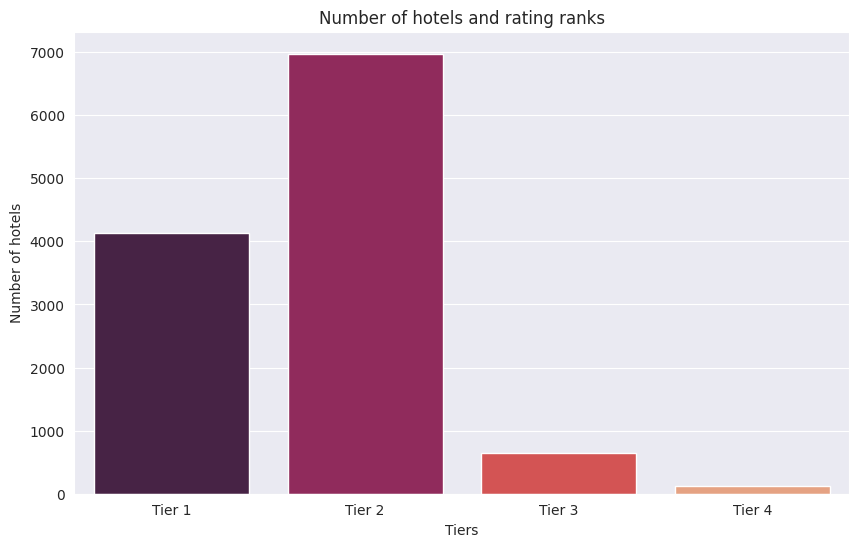

In [283]:
t1 = hotel.Rating[(hotel.Rating <= 5) & (hotel.Rating >= 4)]
t2 = hotel.Rating[(hotel.Rating <= 4) & (hotel.Rating >= 3)]
t3 = hotel.Rating[(hotel.Rating <= 3) & (hotel.Rating >= 2)]
t4 = hotel.Rating[(hotel.Rating <= 2) & (hotel.Rating >= 1)]
x=['Tier 1', 'Tier 2','Tier 3','Tier 4']
y=[len(t1.values),len(t2.values),len(t3.values),len(t4.values)]
plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of hotels and rating ranks")
plt.xlabel("Tiers")
plt.ylabel("Number of hotels")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


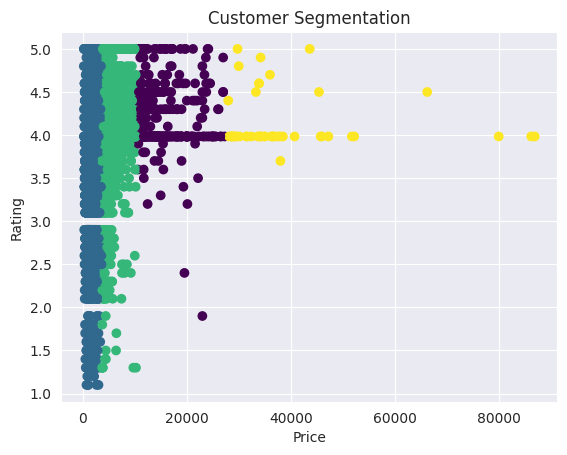

                Price    Rating
Cluster                        
0        15499.192878  4.188150
1         1793.466524  3.952343
2         5437.712696  4.070665
3        39391.717391  4.144641


In [284]:
attributes = hotel[['Price', 'Rating']]
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
kmeans.fit(attributes)
hotel['Cluster'] = kmeans.labels_
plt.scatter(hotel['Price'], hotel['Rating'], c=hotel['Cluster'], cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Customer Segmentation')
plt.show()
segmented_data = hotel.groupby('Cluster')[['Price', 'Rating']].mean()
print(segmented_data)

In [285]:
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(attributes, cluster_labels)
davies_bouldin = davies_bouldin_score(attributes, cluster_labels)
inertia = kmeans.inertia_
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Inertia (Within-Cluster Sum of Squares): {inertia}")


Silhouette Score: 0.6644487903177667
Davies-Bouldin Index: 0.5441596710673624
Inertia (Within-Cluster Sum of Squares): 27615313928.77701


In [286]:
#Using RBMs for feature learning
features = hotel[['Price', 'Rating']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
rbm = BernoulliRBM(n_components=2, n_iter=10, random_state=42)
rbm.fit(features_scaled)
transformed_features = rbm.transform(features_scaled)



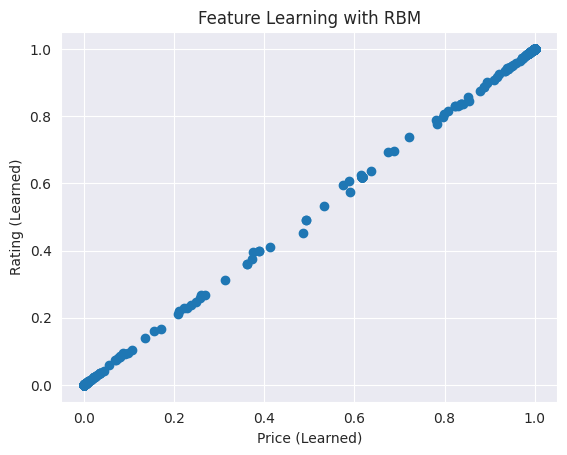

In [287]:
plt.scatter(transformed_features[:, 0], transformed_features[:, 1])
plt.xlabel('Price (Learned)')
plt.ylabel('Rating (Learned)')
plt.title('Feature Learning with RBM')
plt.show()